In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
import matplotlib.pyplot as plt

In [90]:
class Model():
  model: LinearRegression

  def __init__(self):
    self.LinearRegression = LinearRegression()

  def fit(self, x, y):
    return self.LinearRegression.fit(x, y)

  def predict(self, x):
    predicted_labels = [self.model.predict(x)]
    return predicted_labels

  def accuracy(self, predicted, actual):
    mse = m.mean_squared_error(predicted, actual)
    return np.sqrt(mse)


In [91]:
df = pd.read_csv("faithful.csv")
#Old Faithful Geyser data (eruption duration, waiting time in days)
#from: https://www.kaggle.com/datasets/janithwanni/old-faithful?resource=download
df.head(5)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


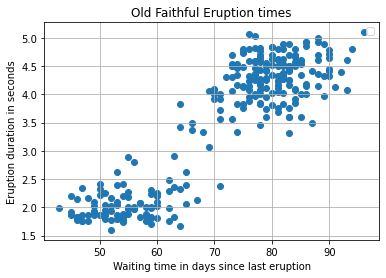

In [92]:
plt.figure()
plt.scatter(df["waiting"], df["eruptions"])
plt.xlabel("Waiting time in days since last eruption")
plt.ylabel("Eruption duration in seconds")
plt.title("Old Faithful Eruption times")
plt.grid()
plt.legend()
plt.show()

In [93]:
eruptions = df.loc[:, "eruptions"] 
time = df.loc[:, "waiting"]
X_train, X_test, Y_train, Y_test = train_test_split(eruptions, time)

In [94]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
eruptions = np.array(eruptions)
model = Model()
model.LinearRegression.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

LinearRegression()

In [95]:
X_test = pd.Series(X_test)
X_test = np.array(X_test)

In [96]:
%%time
Y_pred = model.LinearRegression.predict(X_test.reshape(-1, 1))

CPU times: total: 0 ns
Wall time: 0 ns


In [97]:
print(Y_pred)

[[78.16448094]
 [83.40749448]
 [79.79274601]
 [83.77656789]
 [58.80983678]
 [81.42101109]
 [80.33550104]
 [75.99346084]
 [85.40483296]
 [59.3525918 ]
 [81.7792294 ]
 [54.09872317]
 [75.63524253]
 [53.92504156]
 [58.44076336]
 [78.34901765]
 [82.86473945]
 [51.21126644]
 [86.66402462]
 [78.52269926]
 [74.9079508 ]
 [64.59560533]
 [52.11223978]
 [75.63524253]
 [78.16448094]
 [82.86473945]
 [76.53621587]
 [53.19774983]
 [81.42101109]
 [53.01321312]
 [54.46779658]
 [81.06279277]
 [53.55596814]
 [61.5236119 ]
 [82.69105784]
 [84.13478621]
 [83.04927616]
 [64.41106863]
 [79.60820931]
 [84.49300452]
 [52.47045809]
 [82.86473945]
 [83.04927616]
 [81.96376611]
 [78.70723597]
 [81.42101109]
 [80.52003775]
 [58.98351838]
 [56.63881668]
 [58.26708175]
 [86.3058063 ]
 [56.997035  ]
 [55.18423321]
 [54.09872317]
 [77.07897089]
 [55.72698824]
 [81.60554779]
 [83.40749448]
 [81.96376611]
 [57.35525331]
 [76.53621587]
 [78.16448094]
 [84.13478621]
 [81.96376611]
 [53.38228653]
 [80.15096433]
 [82.50652

In [98]:
Y_pred = pd.DataFrame(Y_pred)
print(Y_pred.head(5))
Y_test = pd.DataFrame(Y_test)
print(Y_test.head(5))
Y_test = np.array(Y_test)
print(model.accuracy(Y_pred, Y_test.reshape(-1, 1)))

           0
0  78.164481
1  83.407494
2  79.792746
3  83.776568
4  58.809837
     waiting
254       88
115       81
30        73
96        84
166       63
5.596070555821633
